Import all the necessary libaries and tools

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
#load the data set
df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


# Task 1: Handle Missing Values and Remove Outliers


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200


In [5]:
df = df['Adj Close']
df

Date
1980-12-12      0.099584
1980-12-15      0.094388
1980-12-16      0.087461
1980-12-17      0.089625
1980-12-18      0.092224
                 ...    
2023-06-29    189.589996
2023-06-30    193.970001
2023-07-03    192.460007
2023-07-05    191.330002
2023-07-06    191.809998
Name: Adj Close, Length: 10730, dtype: float64

In [6]:
df.isnull().sum()

0

In [64]:
# fill the null values
df = df.fillna(method = 'ffill')

In [8]:
df

Date
1980-12-12      0.099584
1980-12-15      0.094388
1980-12-16      0.087461
1980-12-17      0.089625
1980-12-18      0.092224
                 ...    
2023-06-29    189.589996
2023-06-30    193.970001
2023-07-03    192.460007
2023-07-05    191.330002
2023-07-06    191.809998
Name: Adj Close, Length: 10730, dtype: float64

In [9]:
import scipy.stats as stats

Calculating the Z Score

In [10]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(df)

# Define threshold for outliers
threshold = 3

# Filter outliers
df_filtered = df[abs(z_scores) < threshold]

In [12]:
df_filtered

Date
1980-12-12      0.099584
1980-12-15      0.094388
1980-12-16      0.087461
1980-12-17      0.089625
1980-12-18      0.092224
                 ...    
2023-01-04    125.993095
2023-01-05    124.656975
2023-01-06    129.243622
2023-01-09    129.772079
2023-01-10    130.350403
Name: Adj Close, Length: 10200, dtype: float64

Date
1980-12-12    0.457690
1980-12-15    0.457826
1980-12-16    0.458009
1980-12-17    0.457952
1980-12-18    0.457883
                ...   
2023-06-29    4.531036
2023-06-30    4.646349
2023-07-03    4.606595
2023-07-05    4.576845
2023-07-06    4.589482
Name: Adj Close, Length: 10730, dtype: float64


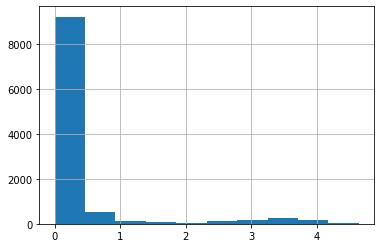

In [11]:
z_scores = np.abs(stats.zscore(df))
z_scores.hist()
print(z_scores)

In [13]:
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='D')

# Task 2: Decompose the Time Series


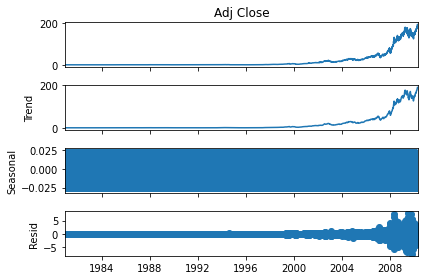

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import statsmodels as sm
df_decom = seasonal_decompose(df,model='additive')
plot = df_decom.plot()

In [15]:
df_mul = seasonal_decompose(df,model='multiplicative')

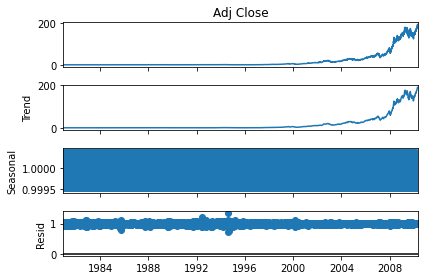

In [16]:
plot = df_mul.plot()

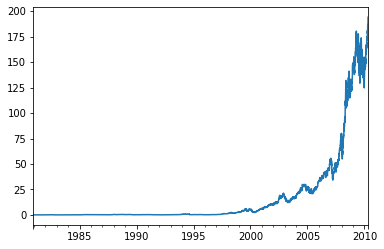

In [17]:
plot = (df_mul.trend * 
     df_mul.seasonal * 
     df_mul.resid).plot()  # multiplying the three components

Using the Hodrick-Prescott (HP) filter to decompose the time series into trend and cyclical components.


In [18]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [19]:
hpfilter(df)

(1980-12-12    0.003147
 1980-12-13   -0.003481
 1980-12-14   -0.011844
 1980-12-15   -0.011115
 1980-12-16   -0.009947
                 ...   
 2010-04-24   -0.272327
 2010-04-25    3.433041
 2010-04-26    1.249714
 2010-04-27   -0.552348
 2010-04-28   -0.743945
 Freq: D, Name: Adj Close_cycle, Length: 10730, dtype: float64,
 1980-12-12      0.096437
 1980-12-13      0.097870
 1980-12-14      0.099304
 1980-12-15      0.100741
 1980-12-16      0.102171
                  ...    
 2010-04-24    189.862323
 2010-04-25    190.536960
 2010-04-26    191.210292
 2010-04-27    191.882350
 2010-04-28    192.553942
 Freq: D, Name: Adj Close_trend, Length: 10730, dtype: float64)

In [20]:
cycle,trend = hpfilter(df)

<AxesSubplot:title={'center':'df Trend Component'}>

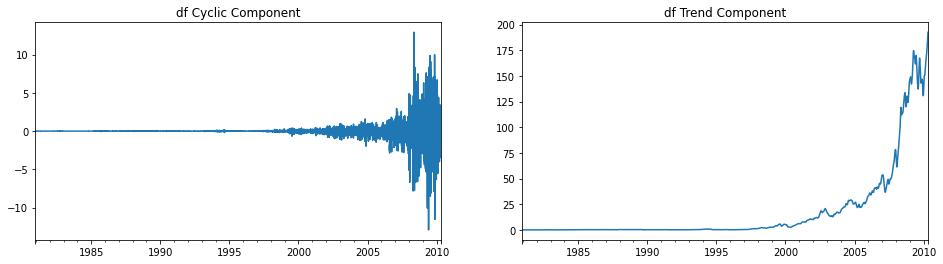

In [22]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
cycle.plot(ax=ax[0], title='df Cyclic Component')
trend.plot(ax=ax[1], title='df Trend Component')

# Task 3: Check for Stationarity



In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss

Performed both the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test on the original time series data.


In [24]:
def print_results(output, test='adf'):
    
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

In [25]:
adf_output = adfuller(df)
kpss_output = kpss(df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_33736\1012672925.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df)


In [26]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,4.30752,8.07595
p-value,1.0,0.01
Numbers of lags,39,60
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.430962,0.739
Critical Value (5%),-2.86181,0.463
Critical Value (10%),-2.566914,0.347
Critical Value (2.5%),NaN,0.574


In [29]:
decomposition = seasonal_decompose(df, model='additive')

# Extract the residual component
residual = decomposition.resid
residual = residual.dropna()


Performed both the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test on the residual time series data.


In [30]:
adf_output = adfuller(residual)
kpss_output = kpss(residual)

C:\Users\DELL\AppData\Local\Temp\ipykernel_33736\2477627320.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_output = kpss(residual)


In [31]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,-26.070643,0.019529
p-value,0.0,0.1
Numbers of lags,39,421
decision,Stationary,Stationary
Critical Value (1%),-3.430962,0.739
Critical Value (5%),-2.861811,0.463
Critical Value (10%),-2.566914,0.347
Critical Value (2.5%),NaN,0.574


# Task 4: Make the Series Stationary


In [35]:
# Square root transform
df_sqrt = np.sqrt(df)
# using first order differencing (detrending)
first_ord_diff = df.diff().dropna()
# using second order differencing
second_ord_diff = df.diff().diff().dropna()
# differencing to remove seasonality
diseasonalize = df.diff(52).dropna()

In [36]:
adf_output = adfuller(df_sqrt)
kpss_output = kpss(df_sqrt)

C:\Users\DELL\AppData\Local\Temp\ipykernel_33736\1078571042.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df_sqrt)


In [37]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,4.035845,12.231983
p-value,1.0,0.01
Numbers of lags,39,60
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.430962,0.739
Critical Value (5%),-2.86181,0.463
Critical Value (10%),-2.566914,0.347
Critical Value (2.5%),NaN,0.574


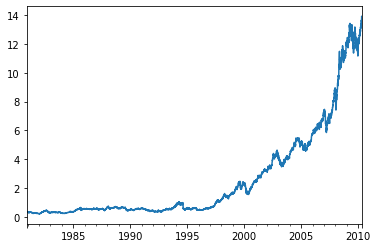

In [38]:
plot = df_sqrt.plot()

# Task 5: Test for Normality


In [39]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

In [40]:
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

<AxesSubplot:>

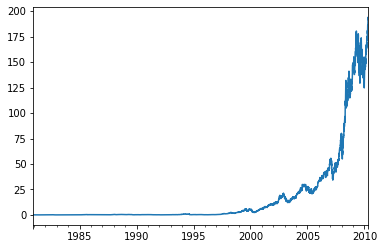

In [42]:
df.plot()

Performed the Shapiro-Wilk test to test for normality of the original and transformed series.


In [43]:
normal_args = (np.mean(df),np.std(df))

print(is_normal(shapiro(df)))
print(is_normal(normaltest(df)))
print(is_normal(normal_ad(df)))
print(is_normal(kstest_normal(df)))
print(is_normal(kstest(df, 
                   cdf='norm', 
                   args=normal_args)))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
normal_args = (np.mean(df_sqrt),np.std(df_sqrt))

print(is_normal(shapiro(df_sqrt)))
print(is_normal(normaltest(df_sqrt)))
print(is_normal(normal_ad(df_sqrt)))
print(is_normal(kstest_normal(df_sqrt)))
print(is_normal(kstest(df_sqrt, 
                   cdf='norm', 
                   args=normal_args)))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Plotted QQ-plots to visually inspect the normality assumption.

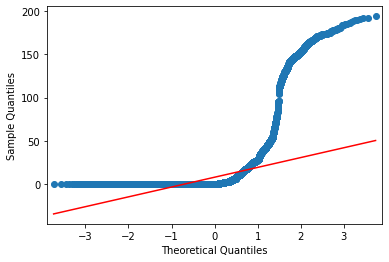

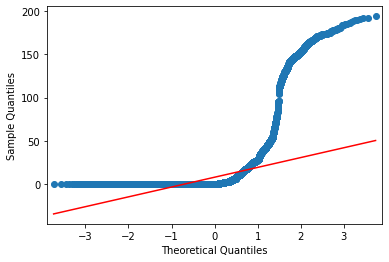

In [45]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df, line='q')

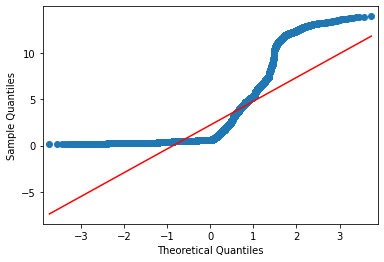

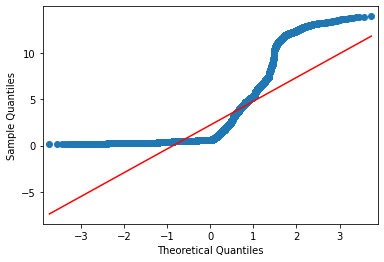

In [46]:
qqplot(df_sqrt,line='q')

# Task 6: Test for Homoscedasticity and Apply Box-Cox Transformation


In [47]:
from statsmodels.stats.api import (het_breuschpagan, het_white)

In [48]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.tools import add_constant
model = AutoReg(df_sqrt.dropna(), lags=1, trend='n').fit()
resid = model.resid
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid, 
                         add_constant(
                             model.fittedvalues)
                        ))
    
    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"
het_test(model, test=het_breuschpagan)

'Heteroskedastic'

In [50]:
het_test(model, test=het_white)

'Heteroskedastic'

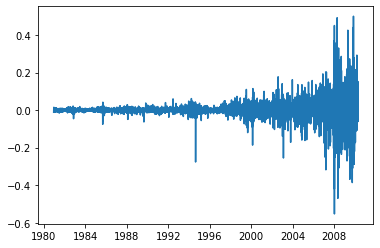

In [51]:
plt.plot(model.resid[1:])

Applied BoxCox transformation

In [49]:
from scipy.stats import boxcox

In [52]:
xt, lmbda = boxcox(df)

In [53]:
xts = pd.Series(xt, index=df.index)

Text(0.5, 1.0, 'Box-Cox Transformed')

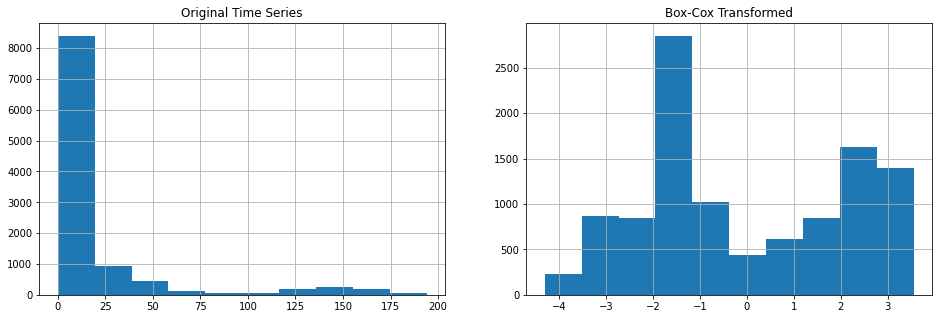

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df.hist(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.hist(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')

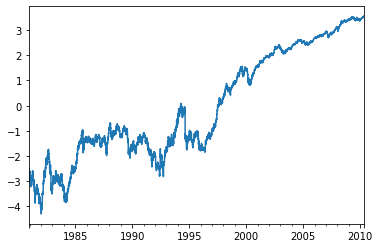

In [55]:
plot = xts.plot()

# Task 7: Fit a Simple Autoregressive Model


In [56]:
model_df = AutoReg(df, lags=1, trend='n').fit()
model_bx = AutoReg(xts, lags=1, trend='n').fit()

Text(0.5, 1.0, 'Residual Plot - Box-Cox Transformed')

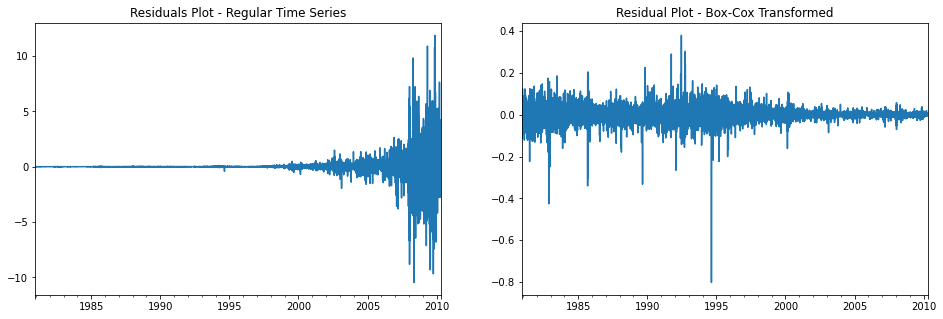

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
model_df.resid.plot(ax=ax[0])
ax[0].set_title('Residuals Plot - Regular Time Series')
model_bx.resid.plot(ax=ax[1])
ax[1].set_title('Residual Plot - Box-Cox Transformed')

In [58]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [59]:
acorr_ljungbox(df, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,10706.978094,0.0
2,21389.551908,0.0
3,32047.752320,0.0
4,42681.442019,0.0
5,53291.763334,0.0
6,63878.371730,0.0
7,74441.691243,0.0
8,84982.053463,0.0
9,95499.668567,0.0
10,105993.928715,0.0


# Task 8: Test for Autocorrelation and Plot ACF/PACF


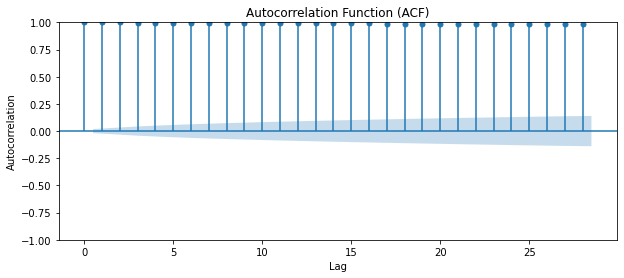

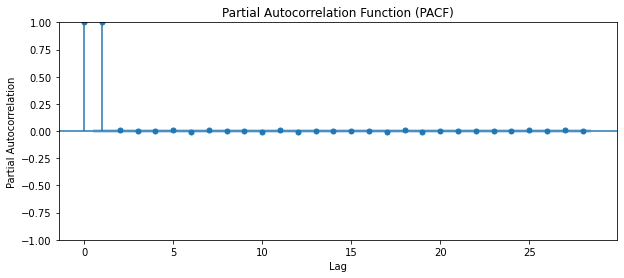

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
lags = 28
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(df_sqrt, lags=lags, alpha=0.05, ax=ax)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(df_sqrt, lags=lags, alpha=0.05, ax=ax)
ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.show()


In [62]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_data, test_data = train_test_split(df_sqrt, test_size=0.2, shuffle=False)


ar_model = AutoReg(df_sqrt.dropna(), lags=1, trend='n').fit()
# Making predictions on the testing set
predictions = ar_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
# Calculating evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.00708651347722394
Mean Absolute Error (MAE): 0.05541227482325073
